In [14]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import pylab as pl
from mpl_toolkits import mplot3d
import plotly.graph_objs as go
from sklearn.cluster import SpectralClustering
import plotly as py
import pandas as pd

In [15]:
combined_csv = pd.read_csv(r"C:\Users\Marcelo\Documents\Hackaton\combined_csv.csv", index_col=None, header=0)
print(combined_csv.shape)

C:\Users\Marcelo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



(1499999, 8)


In [55]:
stores = pd.read_csv(r"C:\Users\Marcelo\Documents\Hackaton\stores_details.csv",index_col=None, header=0)
print(stores.dtypes)

encrypted_cnpj            object
encrypted_cnpj_prefix     object
encrypted_5_zipcode       object
encrypted_domain          object
cnae_code                float64
cnae_desc                 object
cheque                   float64
crediario                float64
credito                  float64
debito                   float64
deposito                 float64
dinheiro                 float64
transferencia            float64
dtype: object


In [56]:
#Remove colunas desncessarias de stores

stores.drop("encrypted_cnpj", inplace=True, axis=1)
#stores.drop("cnae_code", inplace=True, axis=1)
stores.drop("encrypted_cnpj_prefix", inplace=True, axis=1)
stores.drop("encrypted_5_zipcode", inplace=True, axis=1)
stores.drop("encrypted_domain", inplace=True, axis=1)
stores.drop("cnae_desc", inplace=True, axis=1)
stores.drop("cheque", inplace=True, axis=1)
stores.drop("crediario", inplace=True, axis=1)
stores.drop("deposito", inplace=True, axis=1)
stores.drop("transferencia", inplace=True, axis=1)

In [57]:
#Normaliza dados
stores = stores.fillna(0)
stores = stores.round(1)
stores = stores[(stores.T != 0.0).any()]
stores['cnae_code'] = stores['cnae_code'].round(0)
stores['cnae_code'] = stores.cnae_code.astype(int)
#stores = stores.drop_duplicates(subset='cnae_code', keep="first")
print(stores.shape)
print(stores.dtypes)
stores.head()

(1627, 4)
cnae_code      int32
credito      float64
debito       float64
dinheiro     float64
dtype: object


,cnae_code,credito,debito,dinheiro
0,4731800,0.7,0.3,0.0
1,4731800,1.0,0.0,0.0
2,5611203,0.0,0.0,1.0
3,4731800,1.0,0.0,0.0
4,4731800,0.2,0.8,0.0


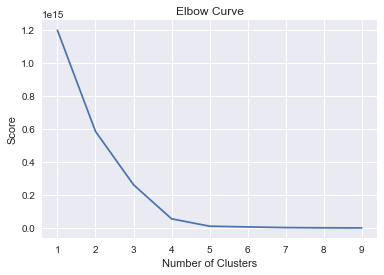

In [58]:
Nc = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(stores).inertia_ for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [59]:
clusters = 4
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(stores) 
  
print(kmeans.labels_)

[0 0 1 ... 0 3 3]


In [62]:
pca = PCA(3) 
pca.fit(stores) 
  
pca_data = pd.DataFrame(pca.transform(stores)) 
  
print(pca_data.head())

              0         1         2
0  423865.71973 -0.370652  0.133190
1  423865.71973 -0.295254  0.026232
2 -455537.28027  0.827816  0.358021
3  423865.71973 -0.295254  0.026232
4  423865.71973 -0.496317  0.311452


In [63]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

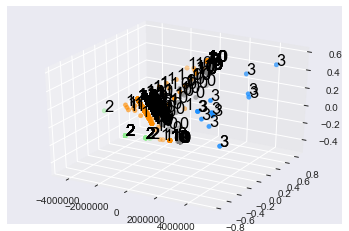

In [64]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 

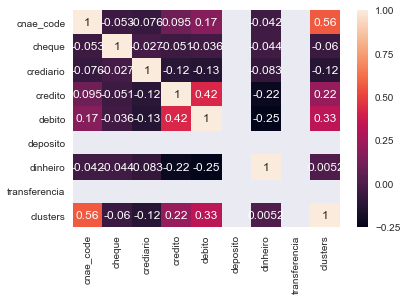

In [53]:
import seaborn as sns 
  
# generating correlation heatmap 
sns.heatmap(stores.corr(), annot = True) 
  
# posting correlation heatmap to output console  
plt.show() 

In [66]:
labels = kmeans.labels_

stores['clusters'] = labels

In [67]:
stores.head()

,cnae_code,credito,debito,dinheiro,clusters
0,4731800,0.7,0.3,0.0,0
1,4731800,1.0,0.0,0.0,0
2,5611203,0.0,0.0,1.0,1
3,4731800,1.0,0.0,0.0,0
4,4731800,0.2,0.8,0.0,0


In [69]:
stores[stores['clusters']==3]

,cnae_code,credito,debito,dinheiro,clusters
181,1412601,0.0,0.0,0.0,3
211,1412601,0.0,0.0,0.0,3
617,1091102,0.2,0.6,0.2,3
702,1053800,0.2,0.4,0.0,3
721,1099604,0.3,0.7,0.0,3
737,0,0.3,0.7,0.0,3
791,1091102,0.6,0.4,0.0,3
944,1053800,0.3,0.7,0.0,3
1284,0,0.0,0.0,1.0,3
1289,1412601,0.1,0.1,0.8,3


In [110]:
stores = stores[stores['clusters']!=0]

In [111]:
stores_aux = pd.read_csv(r"C:\Users\Marcelo\Documents\Hackaton\stores_details.csv",index_col='encrypted_cnpj', header=0)
stores_aux = stores_aux.fillna(0)
stores_aux = stores_aux.round(1)
stores_aux['cnae_code'] = stores_aux['cnae_code'].round(0)
stores_aux['cnae_code'] = stores_aux.cnae_code.astype(int)

In [112]:
stores_completa = pd.merge(stores, stores_aux)

In [115]:
aux = stores_completa[stores_completa['cnae_code']==5611203]

In [116]:
aux['clusters'].value_counts()

2    16340
6     8208
1     3288
5      374
4        1
Name: clusters, dtype: int64